# Urban and rural surrounding areas selection

***
> This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0)
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Load libraries

Here we load the required libraries to execute the notebook. Note that specific code from dedicated scripts (`utils.py`, `urban_areas.py`, ...) is also loaded here.

In [142]:
import os
import numpy as np
import xarray as xr
import cf_xarray as cfxr
from pathlib import Path
import glob
import re
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap



from urbanmask.urban_areas import (
    Urban_vicinity,
)

from urbanmask.UHI_plot_functions import (
    plot_climatology,
    plot_annual_cicle,
    plot_daily_cicle
)

from urbanmask.utils import (
    kelvin2degC,
    traverseDir,
    fix_360_longitudes,
)

## MAP

In [169]:
def plot_summary_map(variable, base_output_dir, domain, model_list, city_list, scenario='', vmax=-2):
    """
    Plots a summary of anomalies for multiple cities and models.

    Parameters:
        variable (str): Name of the variable to analyze.
        base_output_dir (str): Base directory for output files.
        domain (str): Domain identifier.
        model_list (list): List of models to process.
        city_list (list): List of cities to process.
        scenario (str): Scenario identifier, used in file naming.
    """
    n_rows = len(city_list)
    n_cols = len(model_list)
    scenario = "evaluation"

    URBAN = Urban_vicinity()

    # Create the figure and axes with adjusted size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), subplot_kw={'projection': ccrs.PlateCarree()})

    for i, city in enumerate(city_list):
        for j, model in enumerate(model_list):
            # Construct the cache file path
            base_filename = f'{city}-{domain}_{model}_{scenario}_r1i1p1f1'
            output_dir = f"{base_output_dir}/{city}-{domain}_{model}"
            cachefile = f"{output_dir}/{variable}_{base_filename}_map-ur.nc"

            cache_urmask = f"{output_dir}/urmask_{base_filename}_fx.nc"
            urmask = xr.open_dataset(cache_urmask)

            if os.path.exists(cachefile):
                cachefile_var = f"{output_dir}/{variable}_{base_filename}_acycle-ur.nc"
                ds_var = xr.open_dataset(cachefile_var)
                unit = ds_var.attrs.get('units', 'unknown')
                ax = axes[i, j] if n_rows > 1 and n_cols > 1 else axes[max(i, j)]

                plot_climatology(variable, URBAN, cache=cachefile, urban_vicinity=urmask, ax=ax)

                # Add city name in the left-most column
                if j == 0:
                    ax.text(-0.1, 0.5, city, transform=ax.transAxes, ha='right', va='center', fontsize=12, rotation=0, zorder=1000)

                # Add model name in the bottom-most row using `ax.annotate`
                if i == n_rows - 1:
                    ax.annotate(model, xy=(0.5, -0.05), xycoords='axes fraction', ha='center', va='top', fontsize=12, zorder=1000)

    cmap = 'bwr'
    norm = mcolors.Normalize(vmin=-vmax, vmax=vmax)
    
    # Create a colorbar with a larger fraction to push it more to the right
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Dummy array for the colorbar
    
    # Create an axis for the colorbar outside of the subplots
    cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Moved colorbar to the right

    # Add colorbar to the figure, using the custom axis
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

    # Add general labels and title
    if variable in ['huss', 'pr', 'sfcWind']:
        cbar.set_label(f"% of {unit}", rotation=90, fontsize=14)
    else:
        cbar.set_label(f"{unit}", rotation=90, fontsize=14)

    # Adjust the positioning of "Climate Models" and "Cities"
    fig.text(0.5, 0.01, "Climate Models", ha='center', va='center', fontsize=18)  # Moved further down
    fig.text(0.04, 0.5, "Cities", ha='center', va='center', rotation='vertical', fontsize=18)

    # Titles for the different variables
    if variable == 'tasmin':
        fig.suptitle(f"Minimum temperature anomaly", fontsize=20)
    elif variable == 'tasmax':
        fig.suptitle(f"Maximum temperature anomaly", fontsize=20)
    elif variable == 'huss':
        fig.suptitle(f"Atmospheric moisture anomaly", fontsize=20)
    elif variable == 'hurs':
        fig.suptitle(f"Relative humidity anomaly", fontsize=20)
    elif variable == 'sfcWind':
        fig.suptitle(f"Wind speed anomaly", fontsize=20)
    elif variable == 'pr':
        fig.suptitle(f"Precipitation anomaly", fontsize=20)

    # Adjust layout to reduce space between subplots, but leave space for colorbar
    plt.subplots_adjust(left=0.05, right=2, top=0.9, bottom=0.05, wspace=0.1, hspace=0.1)  # Reduced space

    plt.tight_layout(pad=3.0)
    plt.show()

    return fig

/tmp/ipykernel_28664/3228234119.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


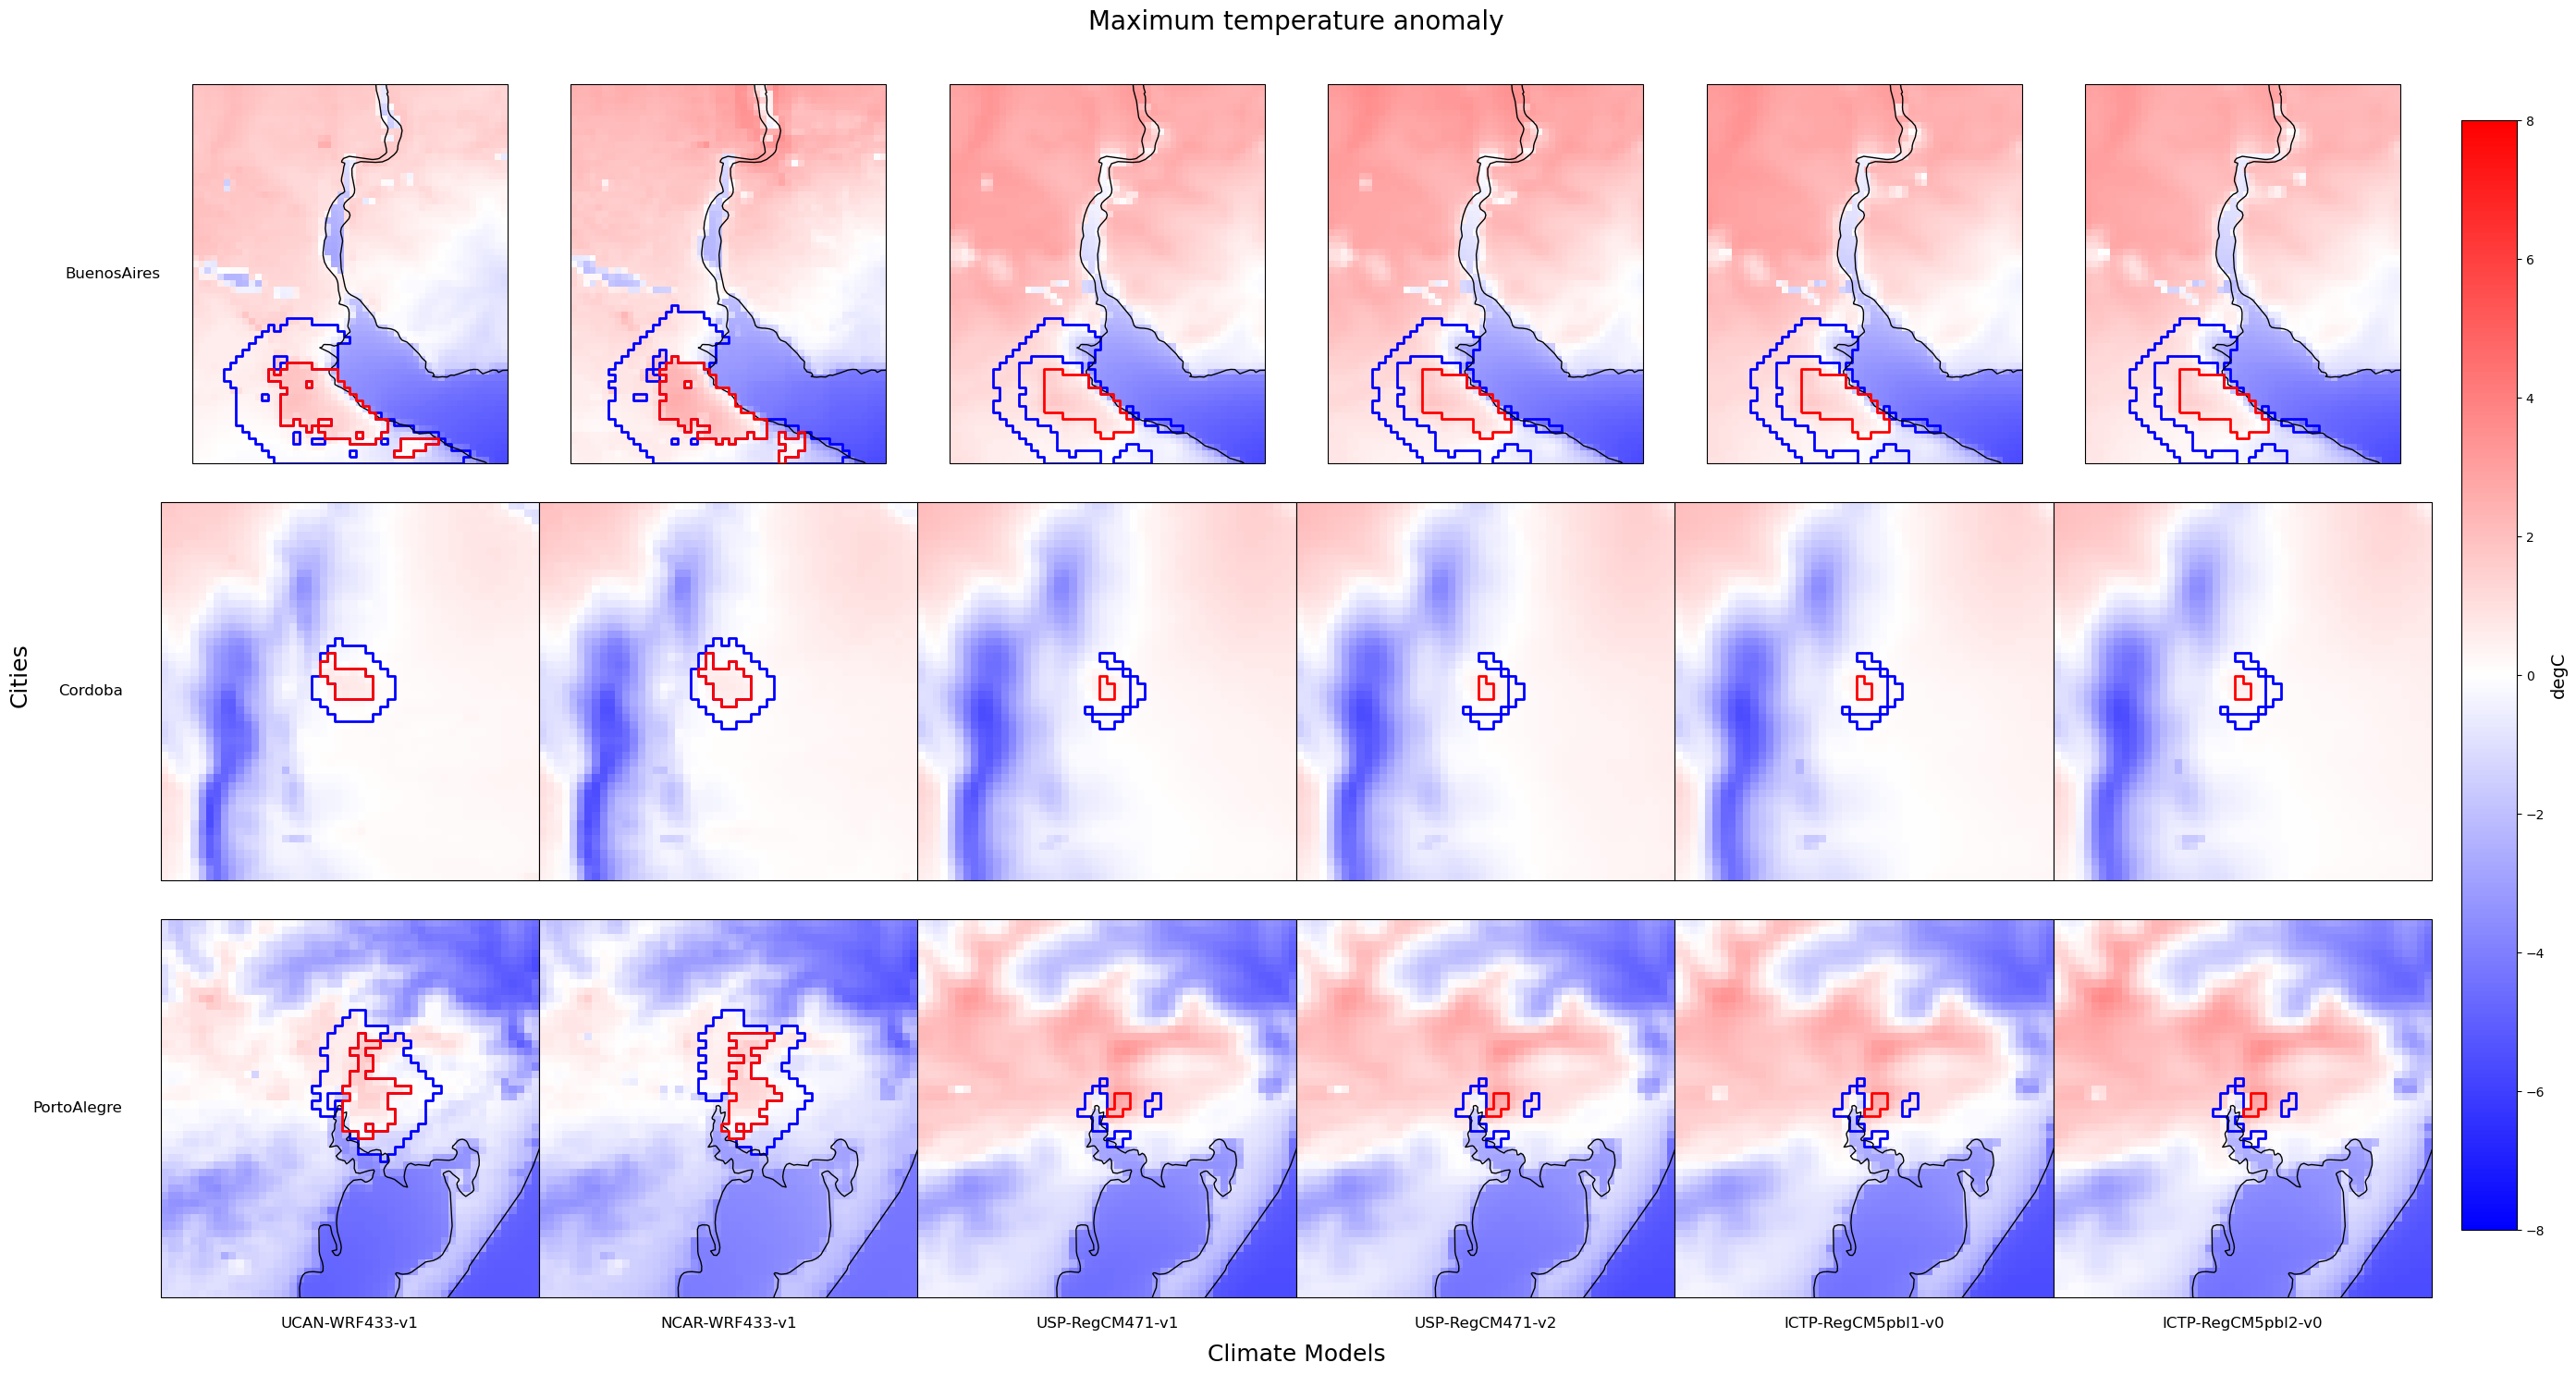

/tmp/ipykernel_28664/3228234119.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


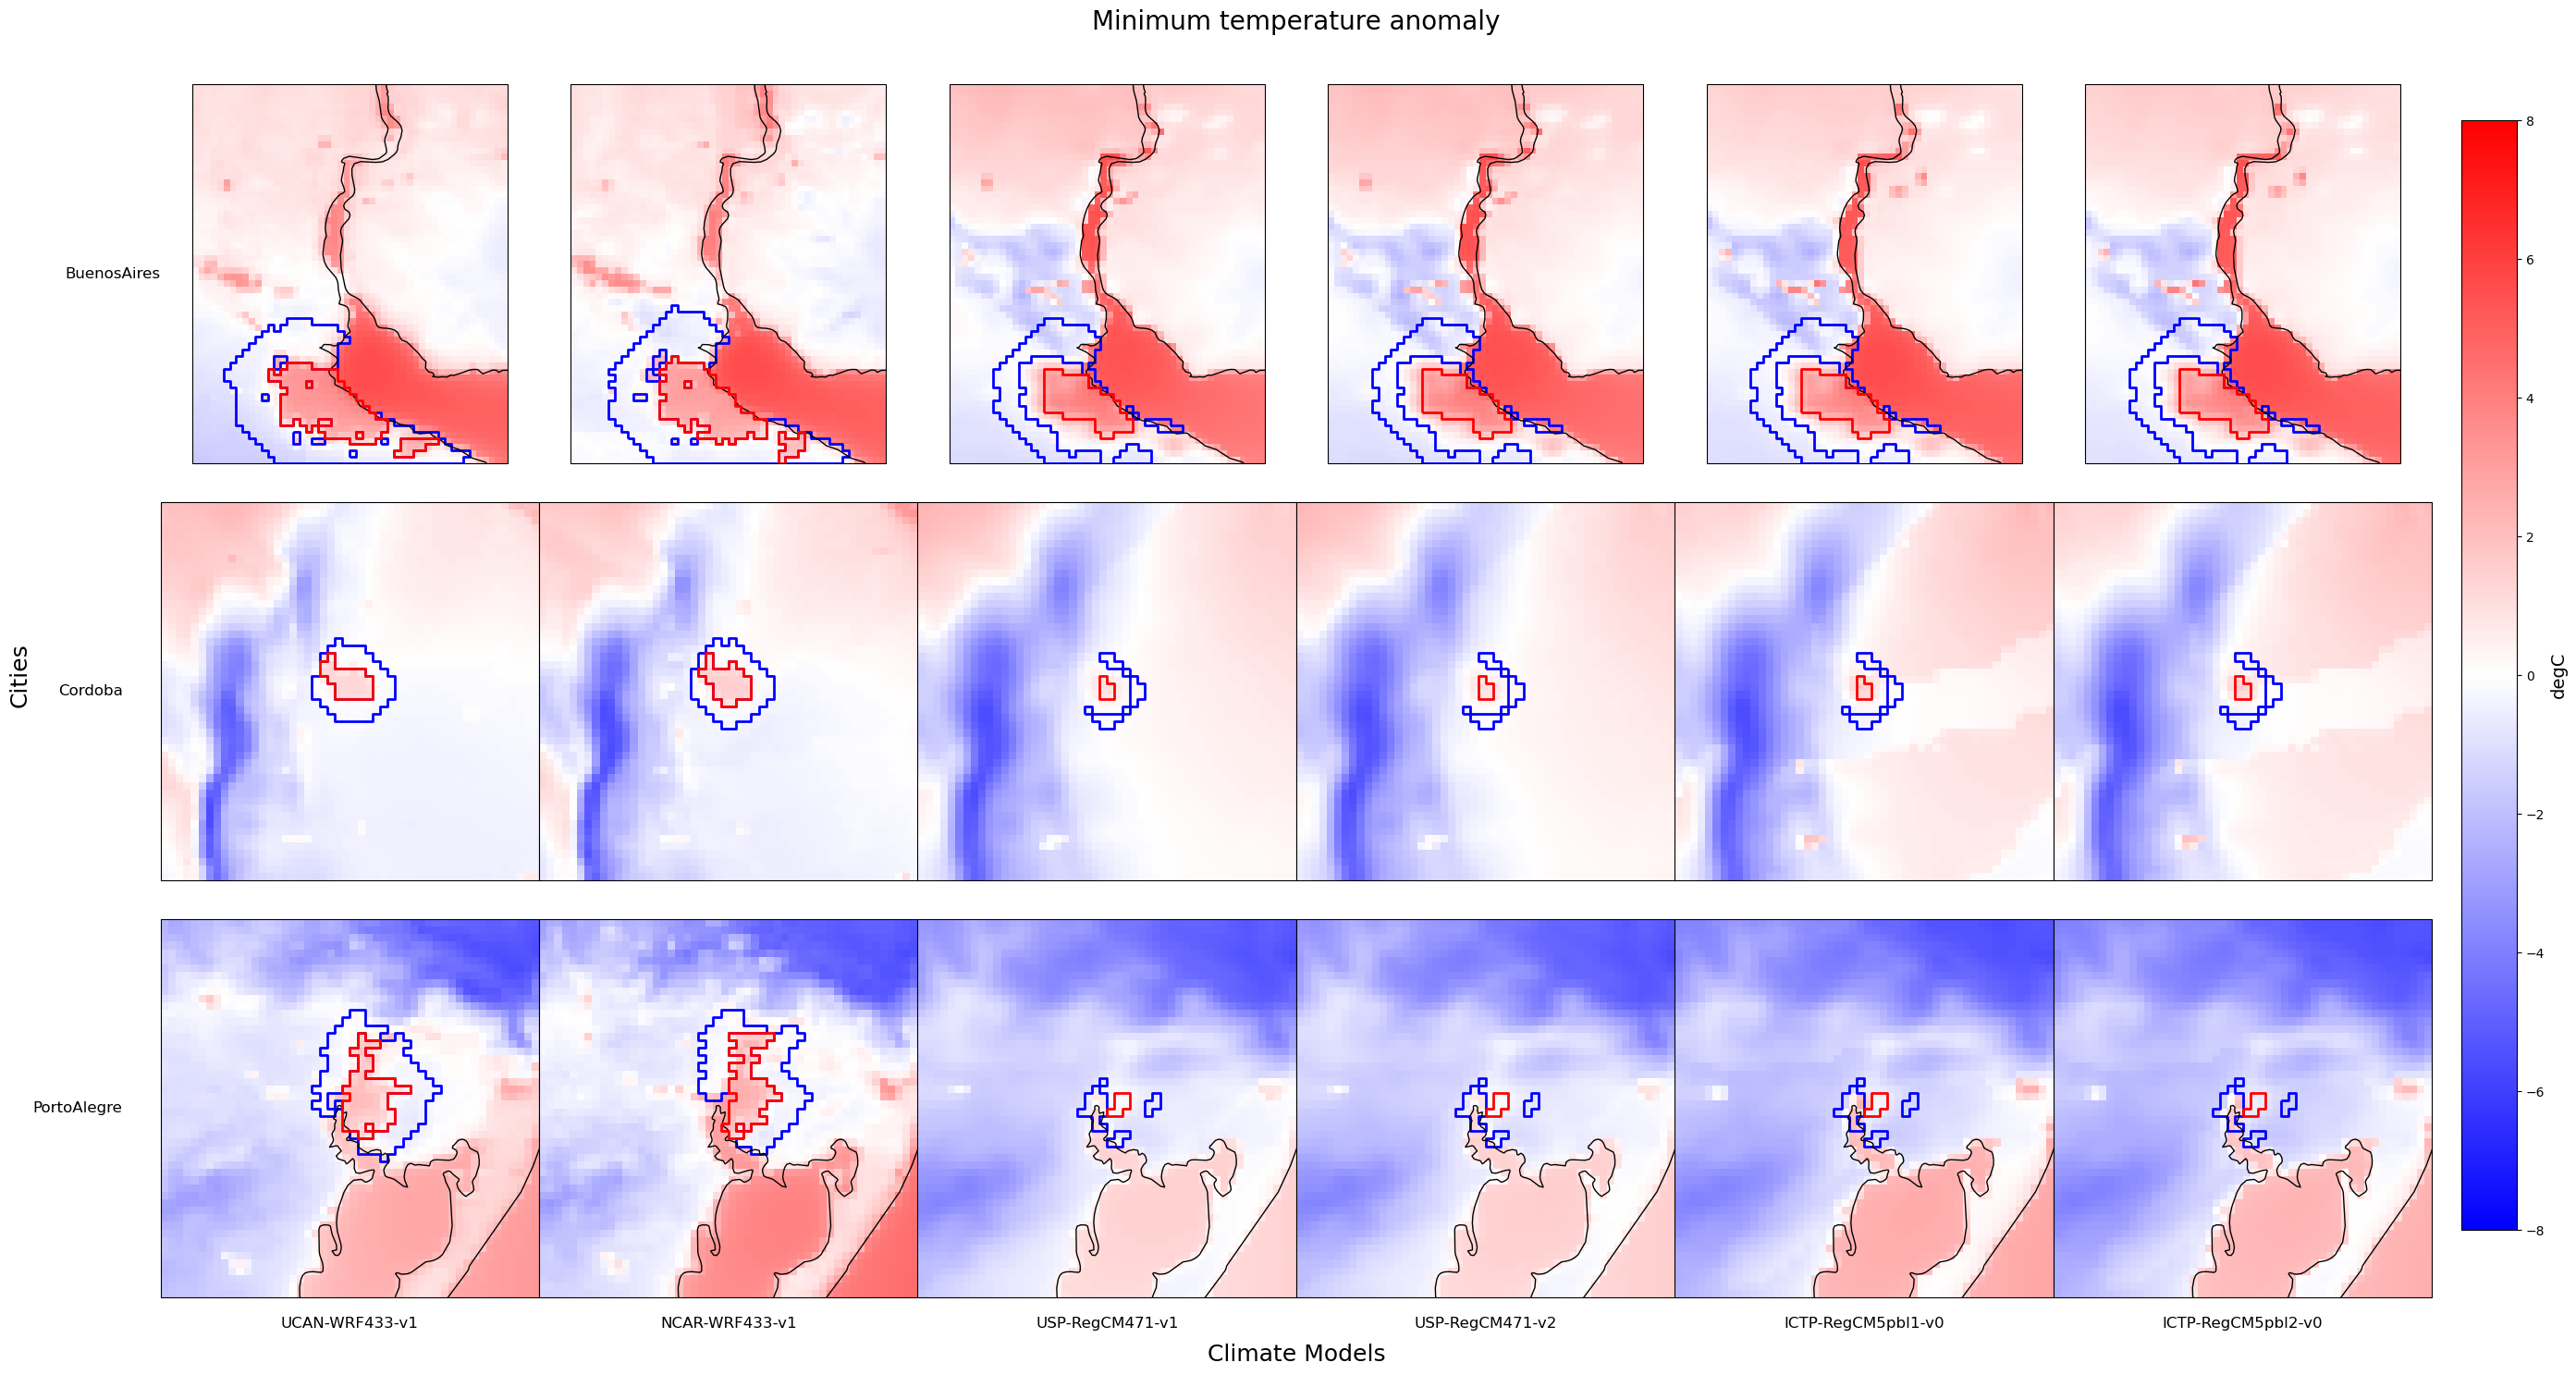

In [170]:
variables = ['tasmax','tasmin']
for variable in variables:
    base_output_dir = 'results'  
    domain = 'CSAM-4i'  
    model_list = ['UCAN-WRF433-v1', 'NCAR-WRF433-v1','USP-RegCM471-v1','USP-RegCM471-v2','ICTP-RegCM5pbl1-v0','ICTP-RegCM5pbl2-v0']
    city_list = ['BuenosAires','Cordoba', 'PortoAlegre']
    fig = plot_summary_map(variable,   base_output_dir, domain, model_list, city_list,vmax=8)
    fig.savefig(f"results/{variable}_summary_map.pdf", bbox_inches='tight')

/tmp/ipykernel_28664/3228234119.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


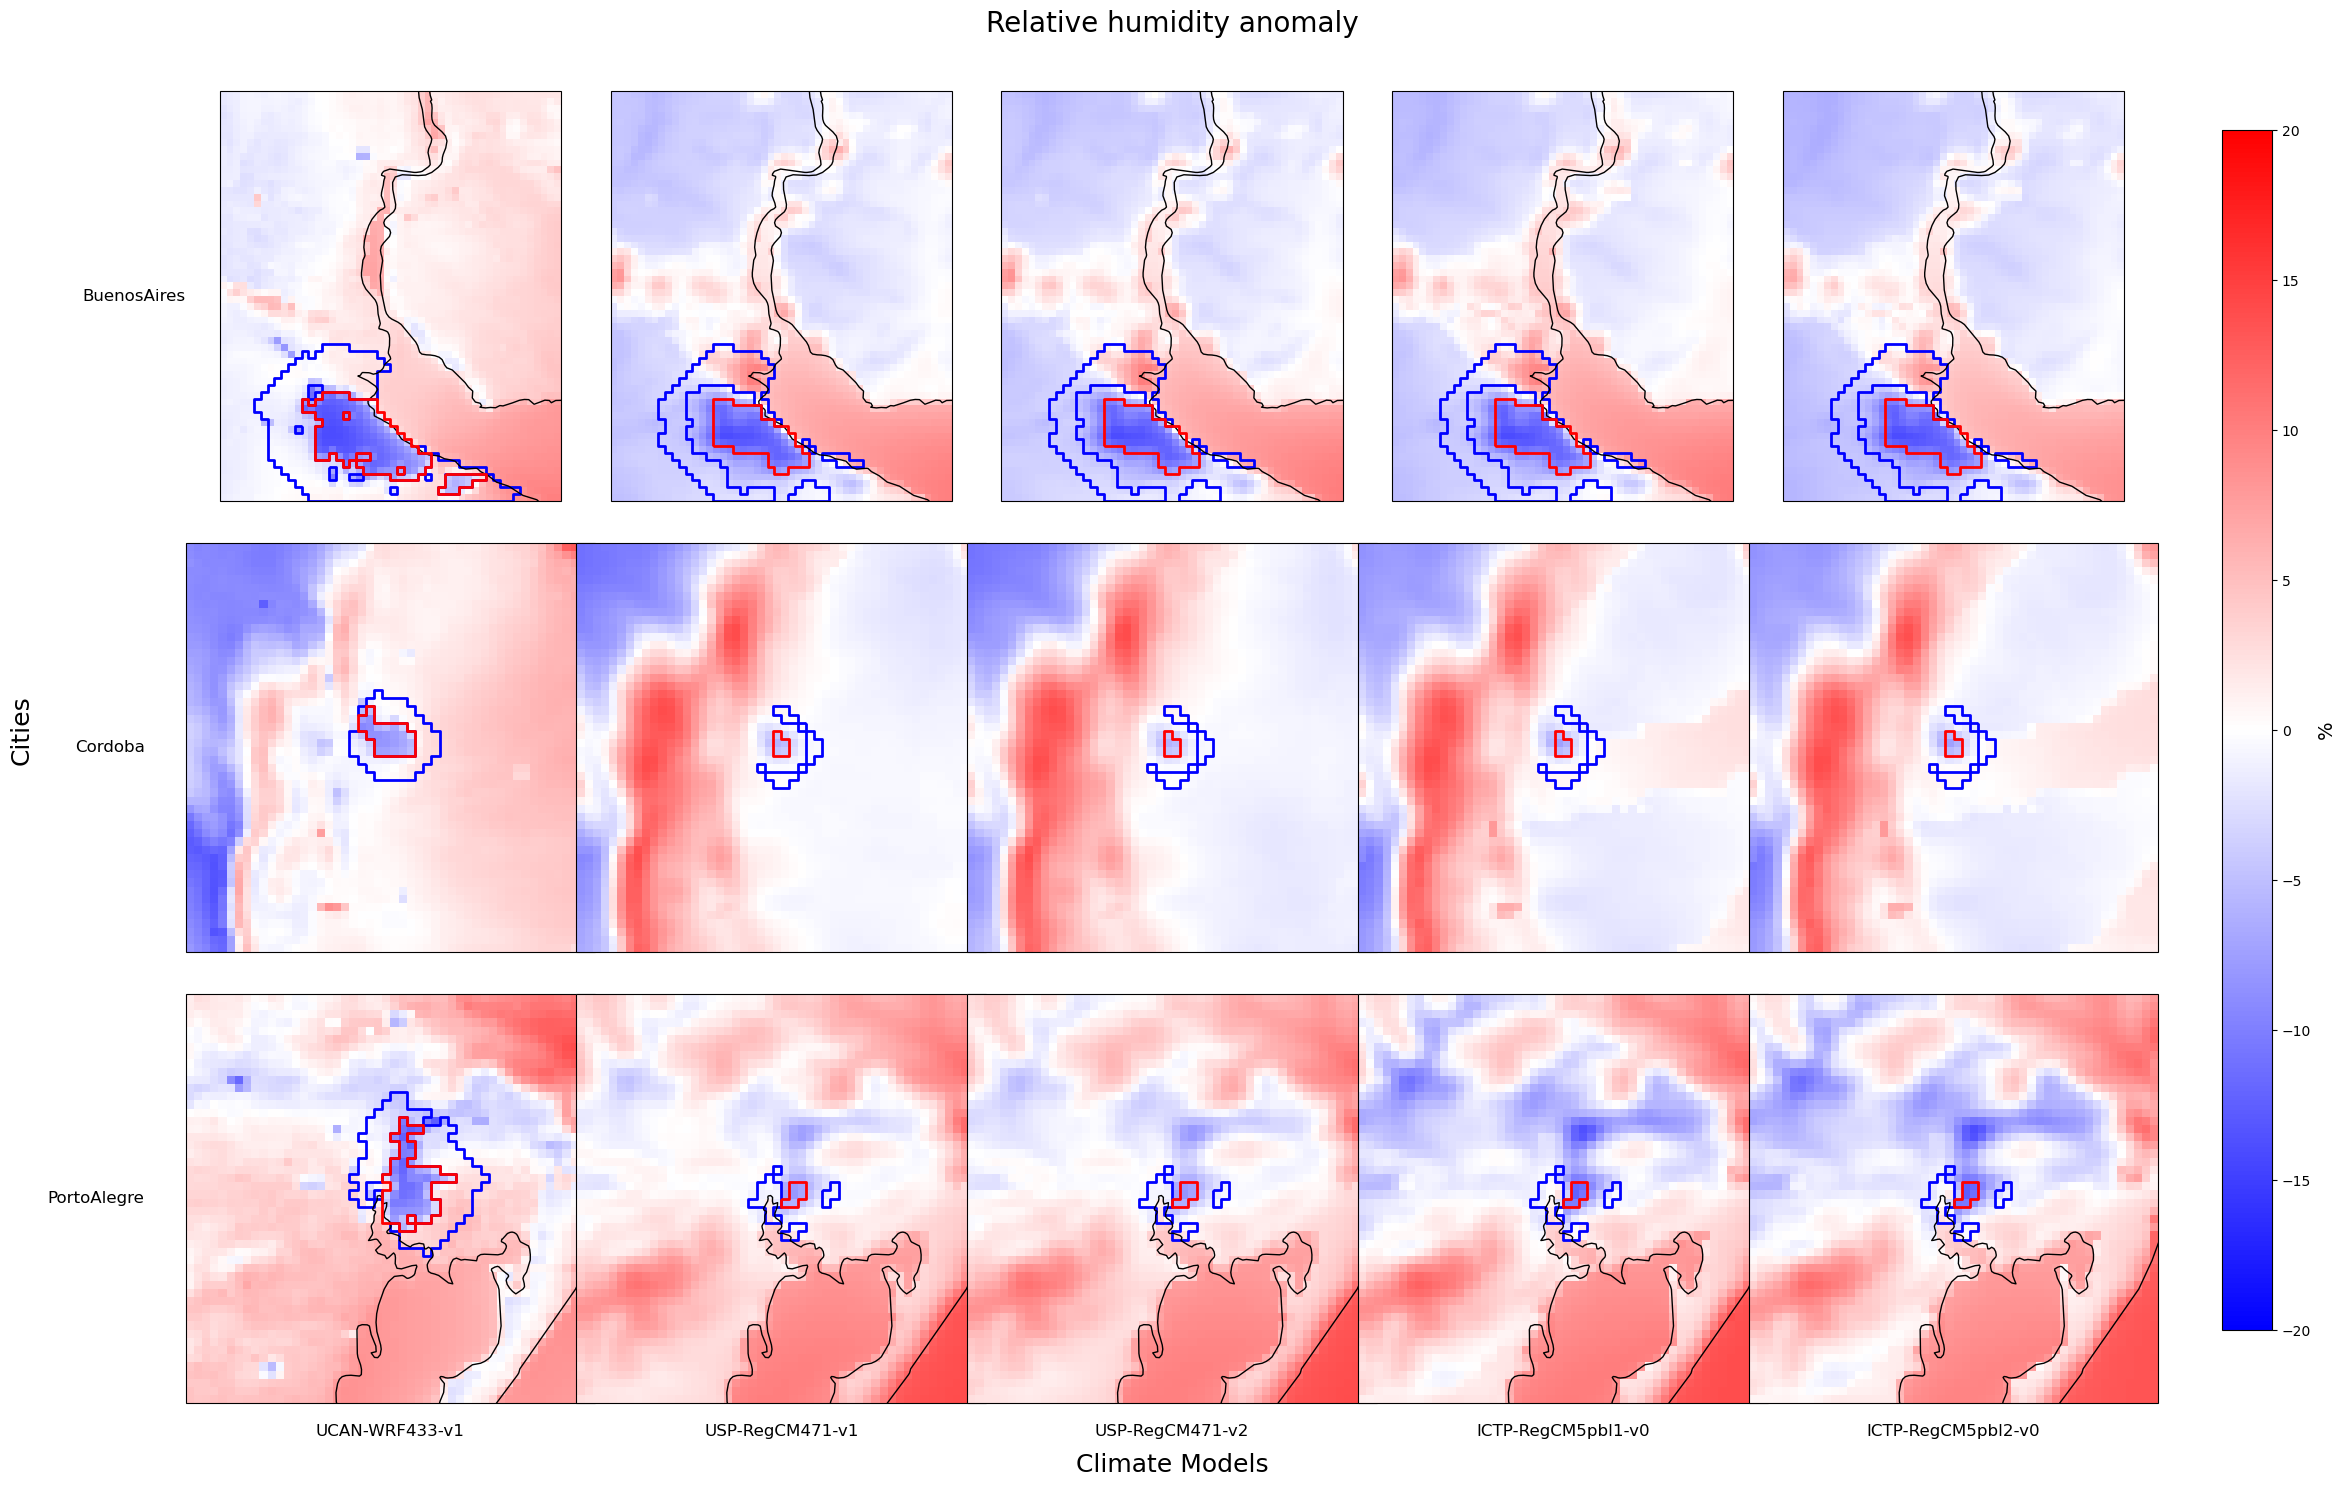

In [171]:
variables = ['hurs']
for variable in variables:
    base_output_dir = 'results'  
    domain = 'CSAM-4i'  
    model_list = ['UCAN-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2','ICTP-RegCM5pbl1-v0','ICTP-RegCM5pbl2-v0']
    city_list = ['BuenosAires','Cordoba', 'PortoAlegre']
    fig = plot_summary_map(variable,   base_output_dir, domain, model_list, city_list,vmax=20)
    fig.savefig(f"results/{variable}_summary_map.pdf", bbox_inches='tight')

/tmp/ipykernel_28664/3228234119.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


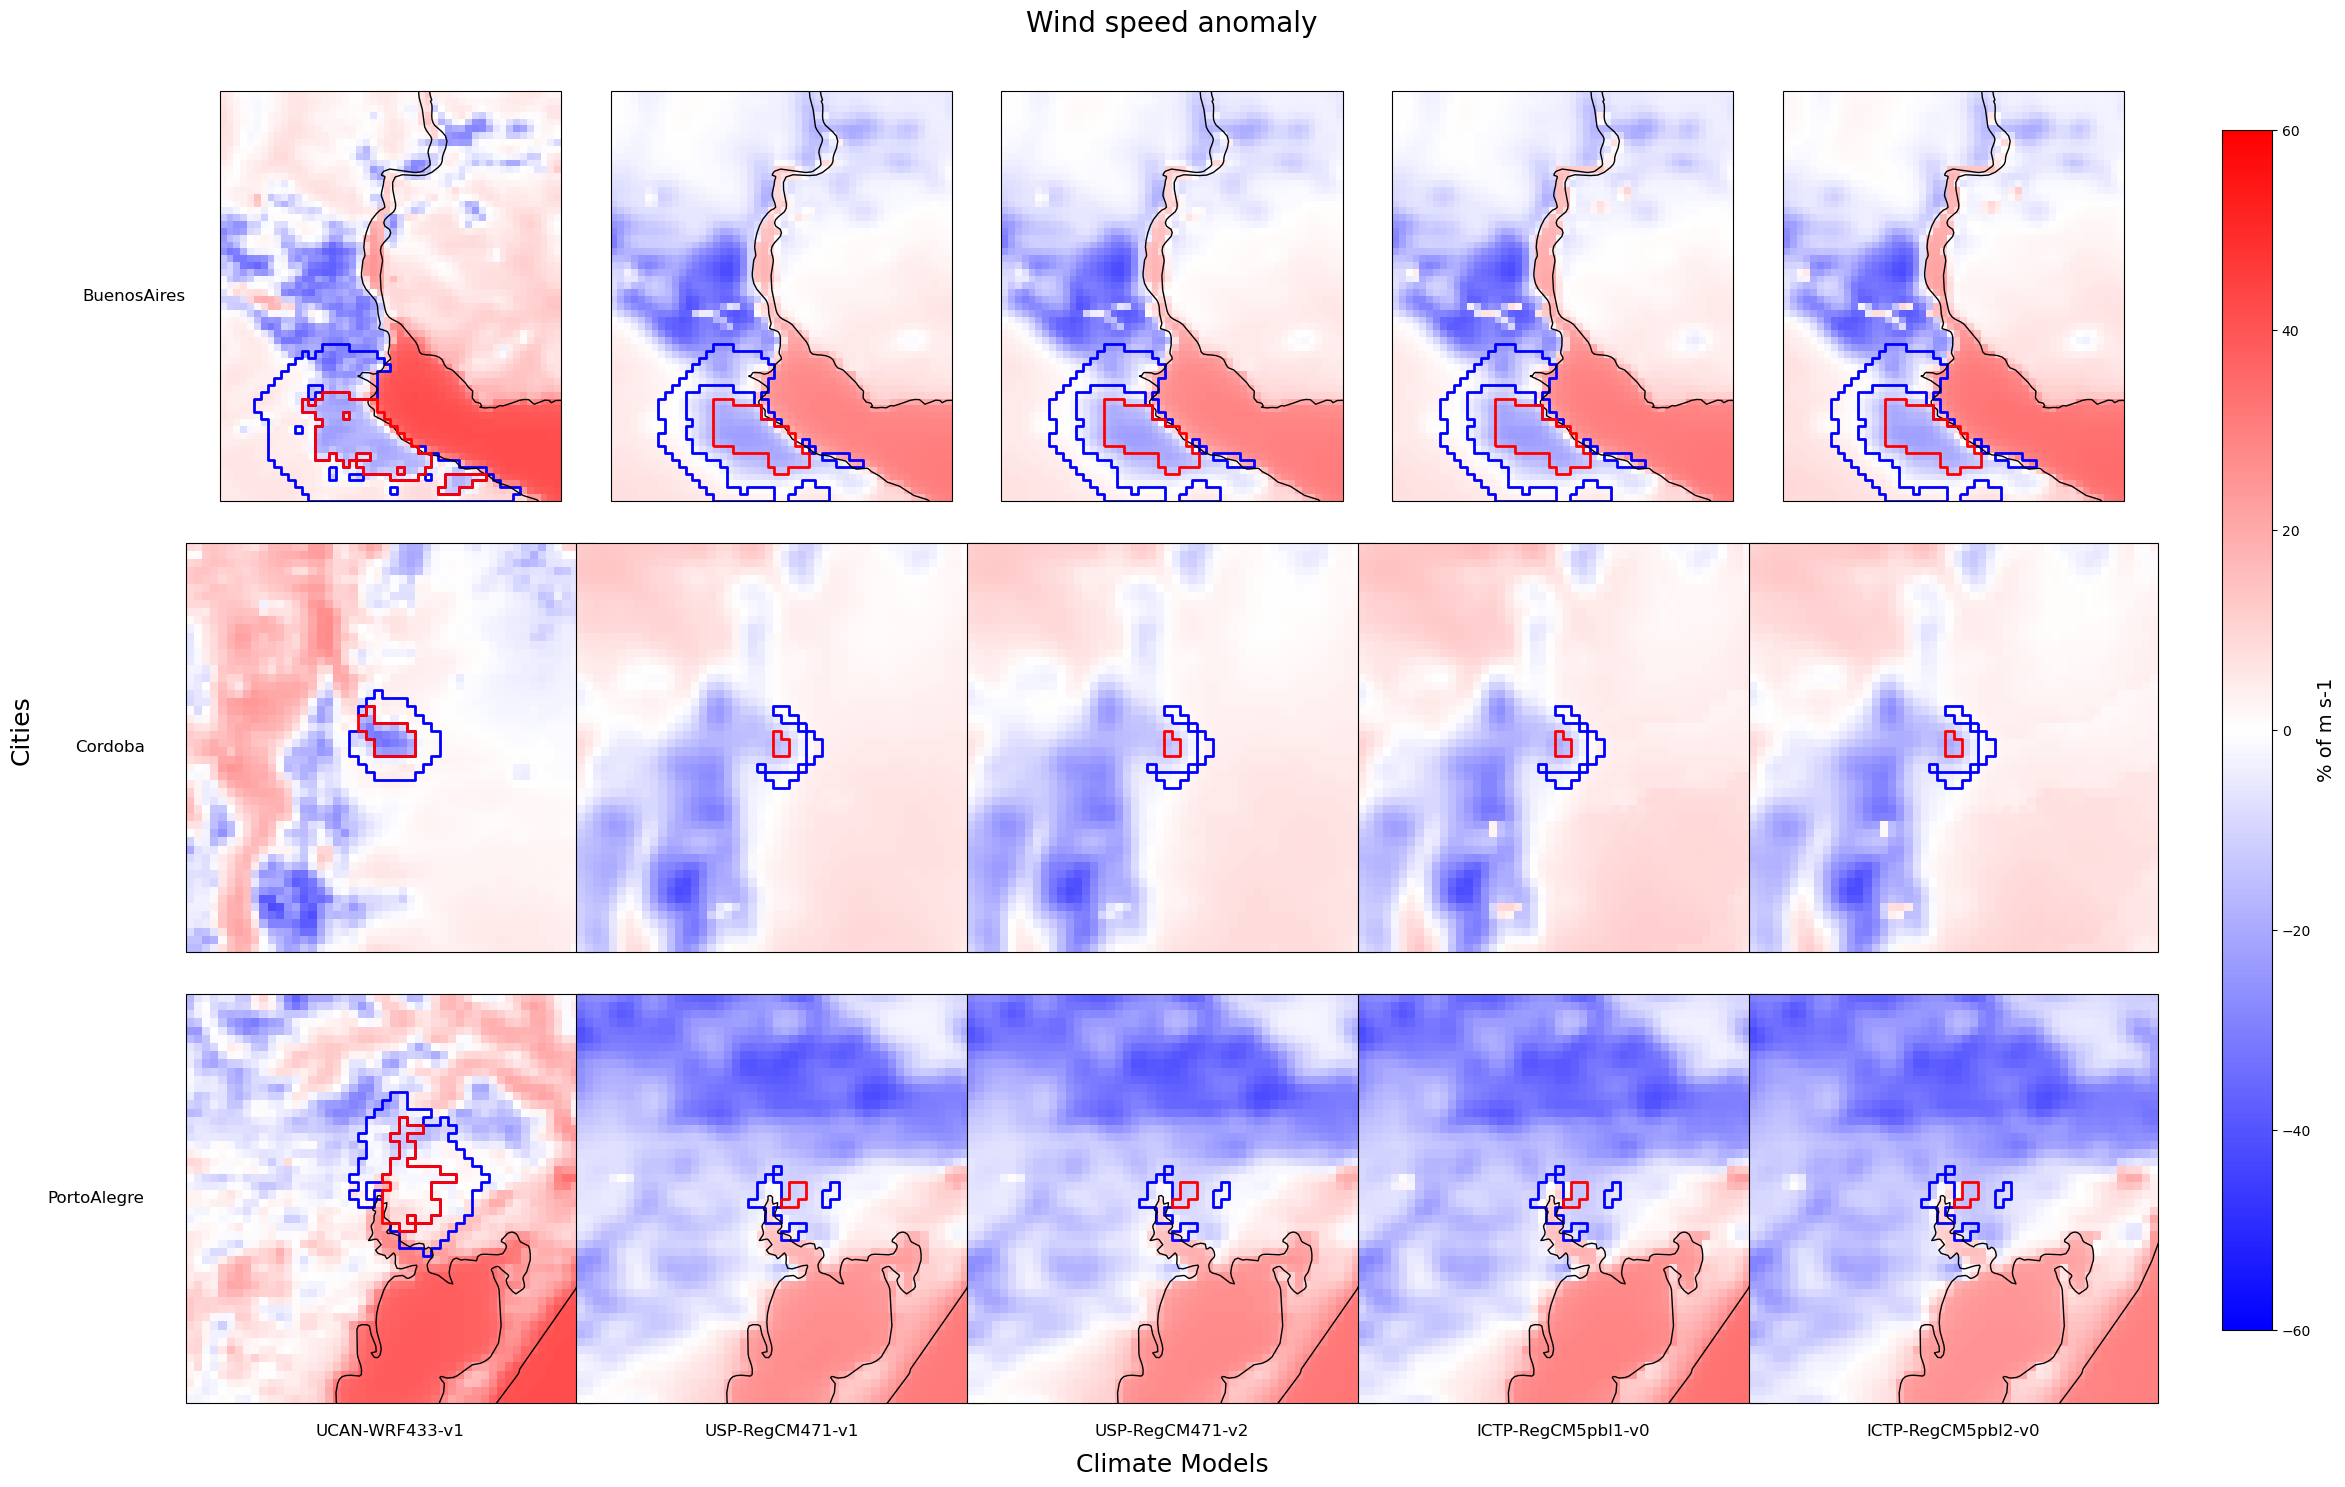

In [172]:
variables = ['sfcWind']
for variable in variables:
    base_output_dir = 'results'  
    domain = 'CSAM-4i'  
    model_list = ['UCAN-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2','ICTP-RegCM5pbl1-v0','ICTP-RegCM5pbl2-v0']
    city_list = ['BuenosAires','Cordoba', 'PortoAlegre']
    fig = plot_summary_map(variable,   base_output_dir, domain, model_list, city_list,vmax=60)
    fig.savefig(f"results/{variable}_summary_map.pdf", bbox_inches='tight')

## Annual acicle

In [153]:
def plot_summary_acicle(variable, base_output_dir, domain, model_list, city_list, scenario='', vmax=3, vmin=-1):
    """
    Plots the urban mean, percentiles (10th and 90th), and the shaded area between them
    for each model and city. Each model is plotted with a different color.

    Additionally, plots a horizontal red line representing the rural baseline (0).

    Parameters:
        variable (str): Name of the variable to analyze.
        base_output_dir (str): Base directory for output files.
        domain (str): Domain identifier.
        model_list (list): List of models to process.
        city_list (list): List of cities to process.
        scenario (str): Scenario identifier, used in file naming.
        vmax (float): Maximum y-axis value.
        vmin (float): Minimum y-axis value.

    Returns:
        matplotlib.figure.Figure: The generated figure.
    """
    colors = plt.cm.get_cmap('tab10', len(model_list)) 

    cmap  = ['#FF5733', '#2ECC71', '#3357FF', '#F1C40F', '#8E44AD', '#FF1493']
    colors = ListedColormap(cmap)

    n_cols = len(city_list)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5), sharey=True)

    if n_cols == 1:
        axes = [axes]

    scenario = 'evaluation'

    # Create a dictionary to track model handles for legend
    model_handles = {}
    rural_line = None  # Store rural line handle

    for i, city in enumerate(city_list):
        ax = axes[i]

        for j, model in enumerate(model_list):
            # Construct the path pattern to the NetCDF files
            base_filename_pattern = f'{city}-{domain}_{model}*_{scenario}_r1i1p1f1'
            output_dir_pattern = f"{base_output_dir}/{city}-{domain}_{model}*"
            cachefile_pattern = f"{output_dir_pattern}/{variable}_{base_filename_pattern}_acycle-ur.nc"
            
            # Use glob to find matching files
            cachefiles = glob.glob(cachefile_pattern)
            
            if not cachefiles:
                print(f"No files found matching pattern: {cachefile_pattern}")
                continue
            
            for cachefile in cachefiles:
                ds = xr.open_dataset(cachefile)
                if model == 'OBS':
                    line, = ax.plot(
                        ds['index'], ds['urban_mean'], color='grey', linewidth=2, label=model if i == 0 else ""
                    )
                else:
                    # Construct the path pattern to the NetCDF files
                    base_filename_pattern = f'{city}-{domain}_{model}*_{scenario}_r1i1p1f1'
                    output_dir_pattern = f"{base_output_dir}/{city}-{domain}_{model}*"
                    cachefile_pattern = f"{output_dir_pattern}/{variable}_{base_filename_pattern}_acycle-ur.nc"
                    
                    # Use glob to find matching files
                    cachefiles = glob.glob(cachefile_pattern)
                    
                    if not cachefiles:
                        print(f"No files found matching pattern: {cachefile_pattern}")
                        continue
                        
                    # Calculate percentiles
                    percentile_10 = ds['urban_anomaly'].quantile(0.1, dim=['lat', 'lon'])
                    percentile_90 = ds['urban_anomaly'].quantile(0.9, dim=['lat', 'lon'])
        
                    # Plot urban mean
                    line, = ax.plot(
                        ds['month'], ds['urban_mean'], color=colors(j), linewidth=2, label=model if i == 0 else ""
                    )
        
                    # Plot percentiles as thinner and softer lines
                    ax.plot(
                        ds['month'], percentile_10, '--', color=colors(j), linewidth=1, alpha=0.5
                    )
                    ax.plot(
                        ds['month'], percentile_90, '--', color=colors(j), linewidth=1, alpha=0.5
                    )
        
                    # Fill the area between the 10th and 90th percentiles
                    ax.fill_between(
                        ds['month'], percentile_10, percentile_90,
                        color=colors(j), alpha=0
                    )
                    ds.close()
        
                    # Store the handle only once (for the first city)
                    if model not in model_handles:
                        model_handles[model] = line

        # Plot horizontal red line for rural mean = 0
        if rural_line is None:  # Only add to legend once
            rural_line = ax.axhline(0, color='black', linestyle='-', linewidth=1, label='Rural baseline')
        else:
            ax.axhline(0, color='black', linestyle='-', linewidth=1)

        ax.set_title(city)
        #ax.set_xlabel("Month")
        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                            'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        #ax.set_ylabel(f"{variable} anomaly (Urban)")
        ax.set_ylim(vmin, vmax)

    # Proper legend showing one line per model + rural baseline
    obs_line = Line2D([0], [0], color='grey', linestyle='-', label='OBS')
    
    fig.legend(
        handles=list(model_handles.values()) + [obs_line, rural_line],
        labels=list(model_handles.keys()) + ['OBS', 'Rural baseline'],
        loc='upper center',
        ncol=len(model_list) + 2,
        bbox_to_anchor=(0.5, 0.99)
    )
    fig.text(0.005, 0.5, f"{variable} anomaly (Urban)", va='center', rotation='vertical')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, wspace=0)
    plt.show()
    return fig


/tmp/ipykernel_28664/1367988993.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/tasmax_PortoAlegre-CSAM-4i_OBS*_evaluation_r1i1p1f1_acycle-ur.nc


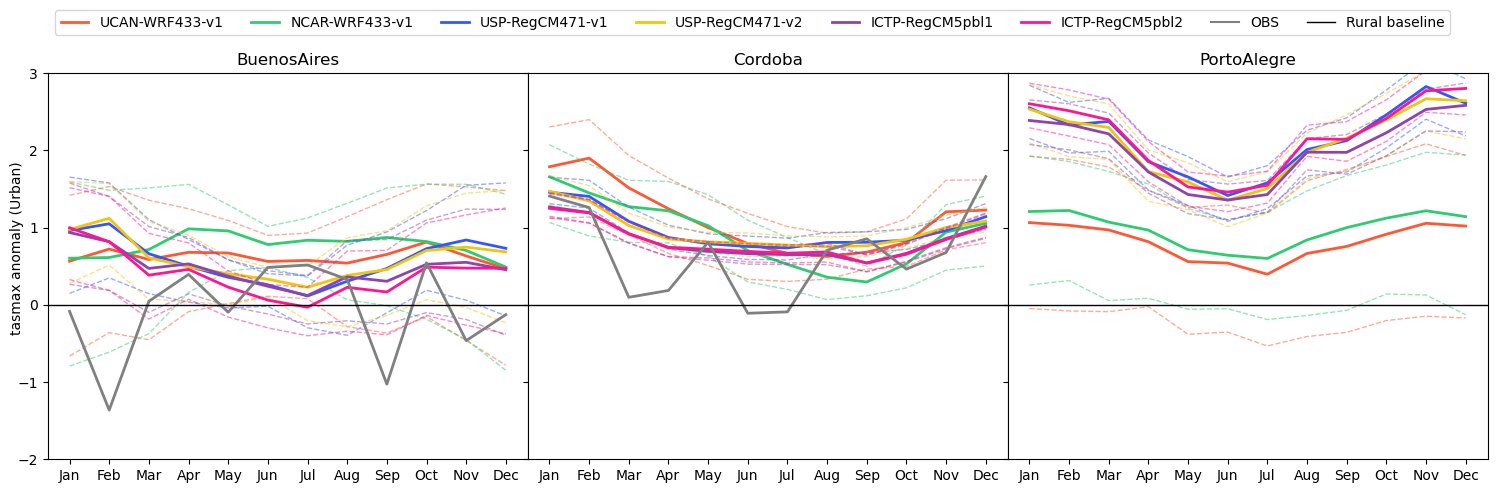

In [155]:
fig = plot_summary_acicle(
    variable='tasmax',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1','NCAR-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2', 'ICTP-RegCM5pbl1','ICTP-RegCM5pbl2', 'OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'],
    vmax=3, vmin=-2)

fig.savefig("results/tasmax_summary.pdf", format='pdf')


/tmp/ipykernel_28664/1367988993.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/tasmin_PortoAlegre-CSAM-4i_OBS*_evaluation_r1i1p1f1_acycle-ur.nc


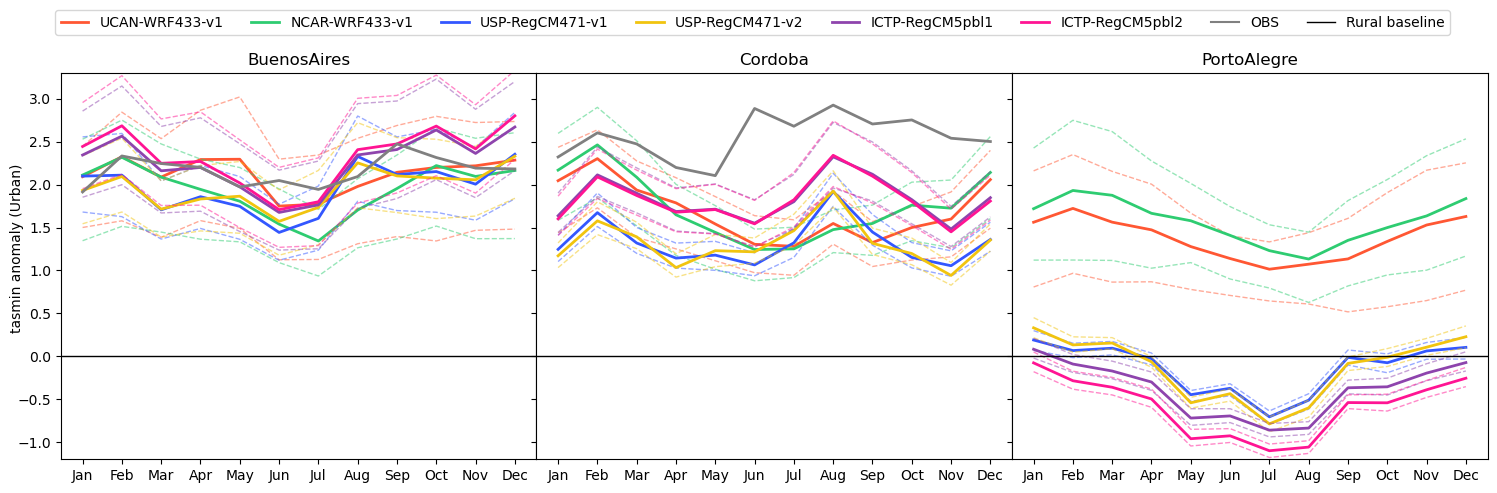

In [156]:
fig = plot_summary_acicle(
    variable='tasmin',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1','NCAR-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2', 'ICTP-RegCM5pbl1','ICTP-RegCM5pbl2', 'OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=3.3, vmin=-1.2
)

fig.savefig("results/tasmin_summary.pdf", format='pdf')


/tmp/ipykernel_28664/1367988993.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/hurs_PortoAlegre-CSAM-4i_OBS*_evaluation_r1i1p1f1_acycle-ur.nc


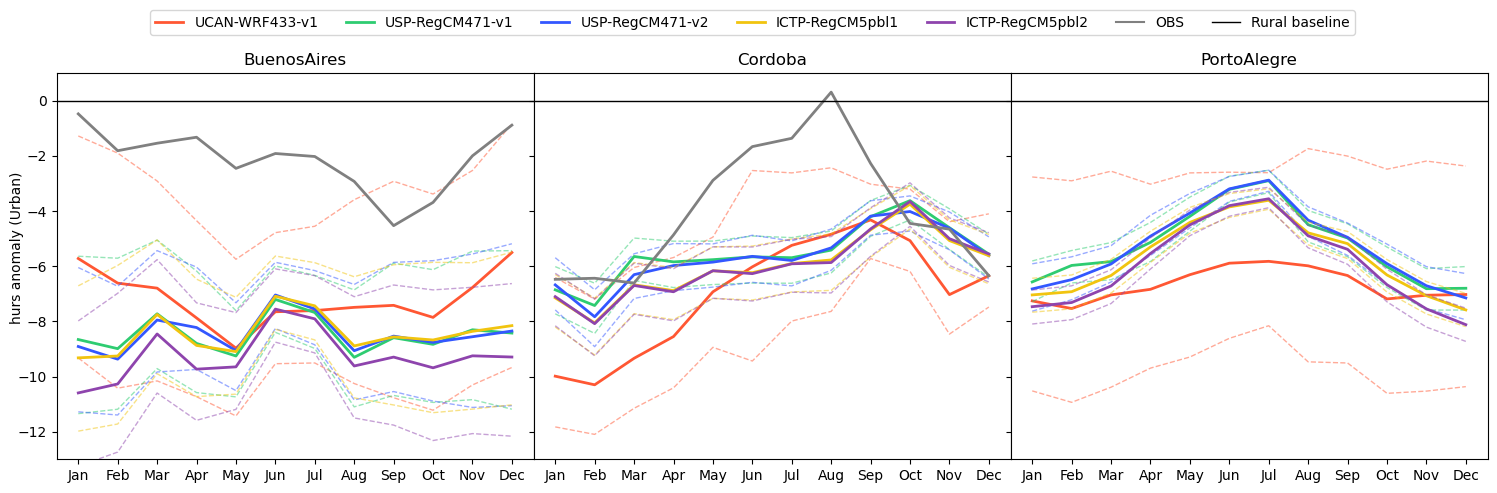

In [157]:
fig = plot_summary_acicle(
    variable='hurs',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2', 'ICTP-RegCM5pbl1','ICTP-RegCM5pbl2','OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=1, vmin=-13
)

fig.savefig("results/hurs_summary.pdf", format='pdf')


/tmp/ipykernel_28664/1367988993.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/sfcWind_PortoAlegre-CSAM-4i_OBS*_evaluation_r1i1p1f1_acycle-ur.nc


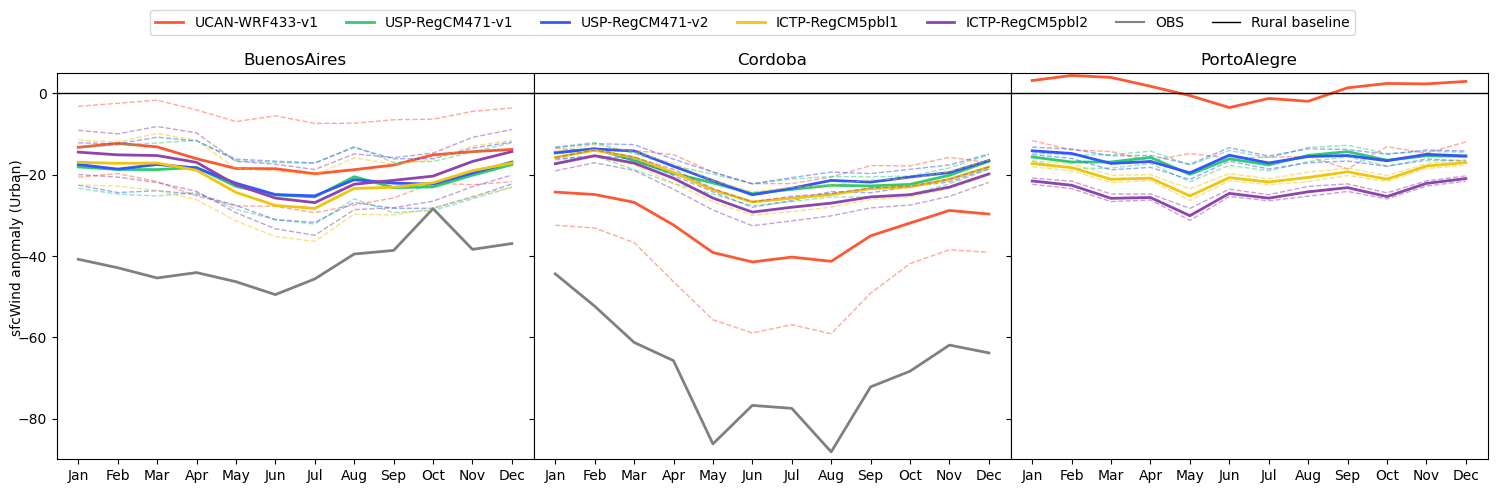

In [158]:
fig = plot_summary_acicle(
    variable='sfcWind',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2', 'ICTP-RegCM5pbl1','ICTP-RegCM5pbl2', 'OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=5, vmin=-90
)

fig.savefig("results/sfcWind_summary.pdf", format='pdf')


## Daily

In [159]:
def plot_summary_daily_cicle_jja(variable, base_output_dir, domain, model_list, city_list, scenario='', vmax=3, vmin=-1):
    """
    Plots the urban mean, percentiles (10th and 90th), and the shaded area between them
    for each model and city. Each model is plotted with a different color.

    Additionally, plots a horizontal red line representing the rural baseline (0).

    Parameters:
        variable (str): Name of the variable to analyze.
        base_output_dir (str): Base directory for output files.
        domain (str): Domain identifier.
        model_list (list): List of models to process.
        city_list (list): List of cities to process.
        scenario (str): Scenario identifier, used in file naming.
        vmax (float): Maximum y-axis value.
        vmin (float): Minimum y-axis value.

    Returns:
        matplotlib.figure.Figure: The generated figure.
    """
    colors = plt.cm.get_cmap('tab10', len(model_list)) 

    cmap  = ['#FF5733', '#2ECC71', '#3357FF', '#F1C40F', '#8E44AD', '#FF1493']
    colors = ListedColormap(cmap)

    n_cols = len(city_list)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5), sharey=True)

    if n_cols == 1:
        axes = [axes]

    scenario = 'evaluation'

    # Create a dictionary to track model handles for legend
    model_handles = {}
    rural_line = None  # Store rural line handle

    for i, city in enumerate(city_list):
        ax = axes[i]

        for j, model in enumerate(model_list):
            # Construct the path pattern to the NetCDF files
            base_filename_pattern = f'{city}-{domain}_{model}*'
            output_dir_pattern = f"{base_output_dir}/{city}-{domain}_{model}*"
            cachefile_pattern = f"{output_dir_pattern}/{variable}_{base_filename_pattern}_day_cycle_jja-ur.nc"
            
            # Use glob to find matching files
            cachefiles = glob.glob(cachefile_pattern)
            
            if not cachefiles:
                print(f"No files found matching pattern: {cachefile_pattern}")
                continue
            
            for cachefile in cachefiles:
                ds = xr.open_dataset(cachefile)
                if model == 'OBS':
                    line, = ax.plot(
                        ds['hour'], ds['anomaly_station_jja'], color='grey', linewidth=2, label=model if i == 0 else ""
                    )
                else:
                    # Construct the path pattern to the NetCDF files
                    base_filename_pattern = f'{city}-{domain}_{model}*r1i1p1f1'
                    output_dir_pattern = f"{base_output_dir}/{city}-{domain}_{model}*"
                    cachefile_pattern = f"{output_dir_pattern}/{variable}_{base_filename_pattern}_day_cycle_jja-ur.nc"
                    
                    # Use glob to find matching files
                    cachefiles = glob.glob(cachefile_pattern)
                    
                    if not cachefiles:
                        print(f"No files found matching pattern: {cachefile_pattern}")
                        continue
                        
                    # Calculate percentiles
                    percentile_10 = ds['urban_anomaly'].quantile(0.1, dim=['lat', 'lon'])
                    percentile_90 = ds['urban_anomaly'].quantile(0.9, dim=['lat', 'lon'])
        
                    # Plot urban mean
                    line, = ax.plot(
                        ds['hour'], ds['urban_mean'], color=colors(j), linewidth=2, label=model if i == 0 else ""
                    )
        
                    # Plot percentiles as thinner and softer lines
                    ax.plot(
                        ds['hour'], percentile_10, '--', color=colors(j), linewidth=1, alpha=0.5
                    )
                    ax.plot(
                        ds['hour'], percentile_90, '--', color=colors(j), linewidth=1, alpha=0.5
                    )
        
                    # Fill the area between the 10th and 90th percentiles
                    ax.fill_between(
                        ds['hour'], percentile_10, percentile_90,
                        color=colors(j), alpha=0
                    )
                    ds.close()
        
                    # Store the handle only once (for the first city)
                    if model not in model_handles:
                        model_handles[model] = line

        # Plot horizontal red line for rural mean = 0
        if rural_line is None:  # Only add to legend once
            rural_line = ax.axhline(0, color='black', linestyle='-', linewidth=1, label='Rural baseline')
        else:
            ax.axhline(0, color='black', linestyle='-', linewidth=1)

        ax.set_title(city)
        #ax.set_xlabel("Month")
        ax.set_xticks(range(0, 24))
        #ax.set_ylabel(f"{variable} anomaly (Urban)")
        ax.set_ylim(vmin, vmax)

    # Proper legend showing one line per model + rural baseline
    obs_line = Line2D([0], [0], color='grey', linestyle='-', label='OBS')
    
    fig.legend(
        handles=list(model_handles.values()) + [obs_line, rural_line],
        labels=list(model_handles.keys()) + ['OBS', 'Rural baseline'],
        loc='upper center',
        ncol=len(model_list) + 2,
        bbox_to_anchor=(0.5, 0.99)
    )
    fig.text(0.005, 0.5, f"{variable} anomaly (Urban)", va='center', rotation='vertical')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, wspace=0)
    plt.show()
    return fig


/tmp/ipykernel_28664/4238199440.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/tas_PortoAlegre-CSAM-4i_OBS*_day_cycle_jja-ur.nc


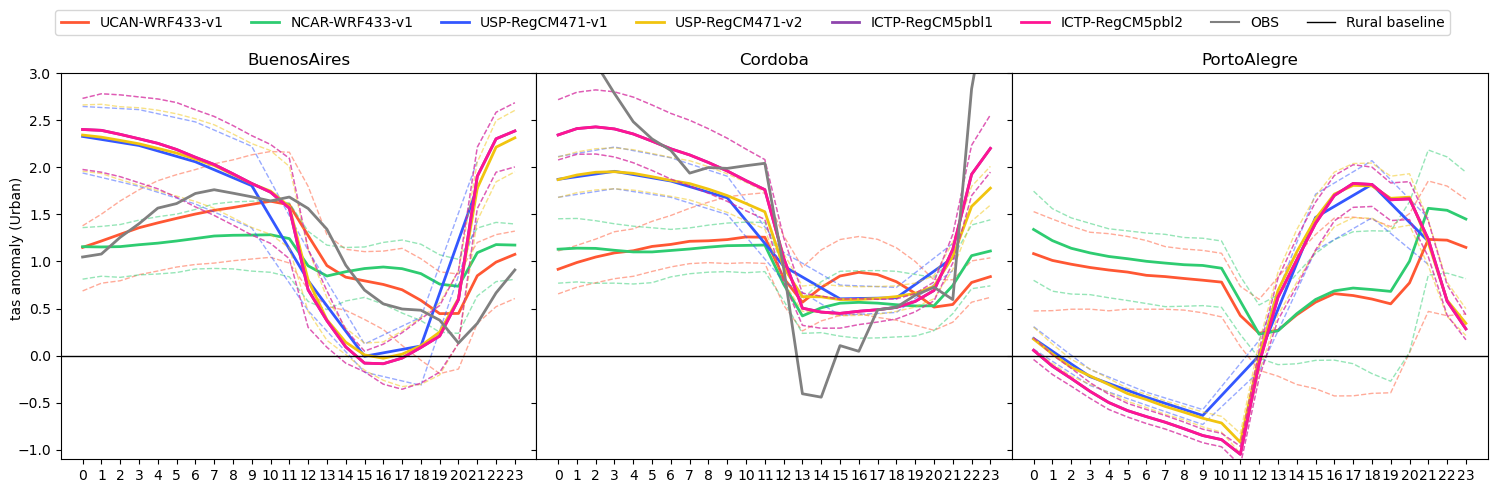

In [181]:
fig = plot_summary_daily_cicle_jja(
    variable='tas',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1','NCAR-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2', 'ICTP-RegCM5pbl1','ICTP-RegCM5pbl2', 'OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=3, vmin=-1.1
)

fig.savefig("results/tas_summary_jja.pdf", format='pdf')


/tmp/ipykernel_28664/4238199440.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/hurs_PortoAlegre-CSAM-4i_OBS*_day_cycle_jja-ur.nc


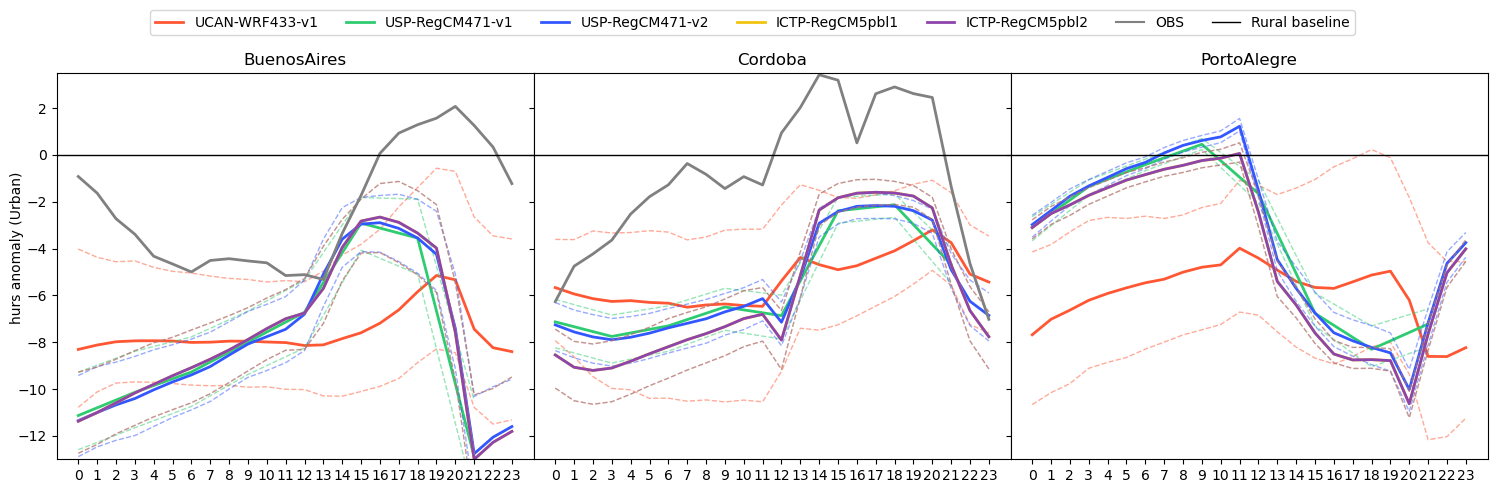

In [161]:
fig = plot_summary_daily_cicle_jja(
    variable='hurs',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1','USP-RegCM471-v1','USP-RegCM471-v2', 'ICTP-RegCM5pbl1','ICTP-RegCM5pbl2','OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=3.5, vmin=-13
)

fig.savefig("results/hurs_summary_jja.pdf", format='pdf')


/tmp/ipykernel_28664/4238199440.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/sfcWind_PortoAlegre-CSAM-4i_OBS*_day_cycle_jja-ur.nc


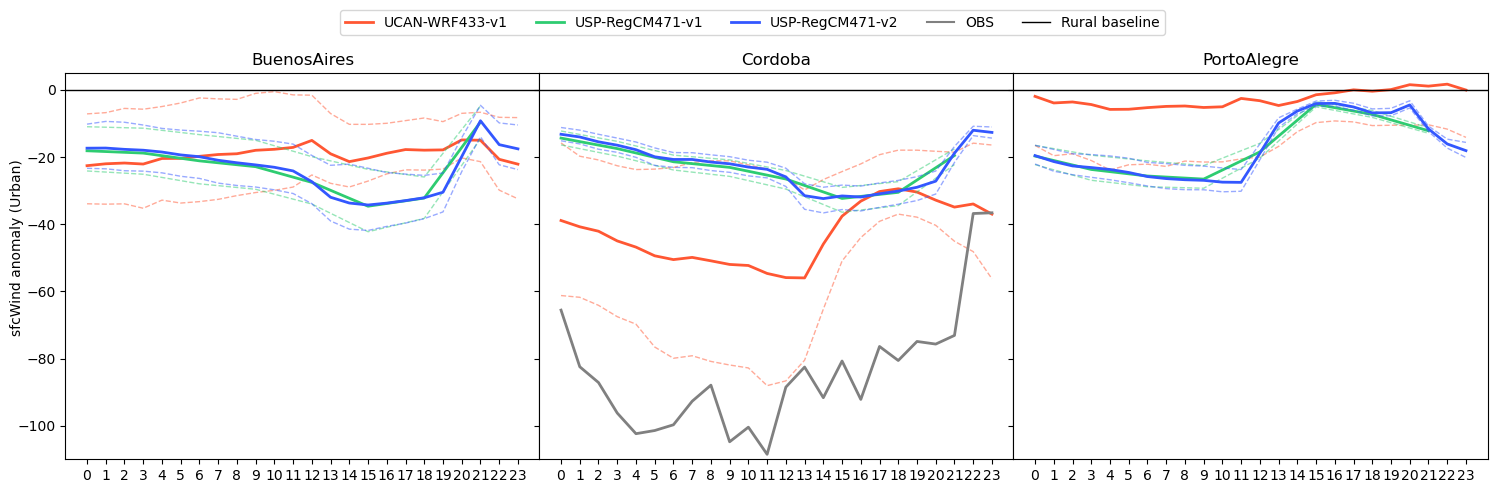

In [162]:
fig = plot_summary_daily_cicle_jja(
    variable='sfcWind',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2', 'OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=5, vmin=-110
)

fig.savefig("results/sfcWind_summary_jja.pdf", format='pdf')


In [175]:
def plot_summary_daily_cicle_djf(variable, base_output_dir, domain, model_list, city_list, scenario='', vmax=3, vmin=-1):
    """
    Plots the urban mean, percentiles (10th and 90th), and the shaded area between them
    for each model and city. Each model is plotted with a different color.

    Additionally, plots a horizontal red line representing the rural baseline (0).

    Parameters:
        variable (str): Name of the variable to analyze.
        base_output_dir (str): Base directory for output files.
        domain (str): Domain identifier.
        model_list (list): List of models to process.
        city_list (list): List of cities to process.
        scenario (str): Scenario identifier, used in file naming.
        vmax (float): Maximum y-axis value.
        vmin (float): Minimum y-axis value.

    Returns:
        matplotlib.figure.Figure: The generated figure.
    """
    colors = plt.cm.get_cmap('tab10', len(model_list)) 

    cmap  = ['#FF5733', '#2ECC71', '#3357FF', '#F1C40F', '#8E44AD', '#FF1493']
    colors = ListedColormap(cmap)

    n_cols = len(city_list)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5), sharey=True)

    if n_cols == 1:
        axes = [axes]

    scenario = 'evaluation'

    # Create a dictionary to track model handles for legend
    model_handles = {}
    rural_line = None  # Store rural line handle

    for i, city in enumerate(city_list):
        ax = axes[i]

        for j, model in enumerate(model_list):
            # Construct the path pattern to the NetCDF files
            base_filename_pattern = f'{city}-{domain}_{model}*'
            output_dir_pattern = f"{base_output_dir}/{city}-{domain}_{model}*"
            cachefile_pattern = f"{output_dir_pattern}/{variable}_{base_filename_pattern}_day_cycle_djf-ur.nc"
            
            # Use glob to find matching files
            cachefiles = glob.glob(cachefile_pattern)
            
            if not cachefiles:
                print(f"No files found matching pattern: {cachefile_pattern}")
                continue
            
            for cachefile in cachefiles:
                ds = xr.open_dataset(cachefile)
                if model == 'OBS':
                    line, = ax.plot(
                        ds['hour'], ds['anomaly_station_djf'], color='grey', linewidth=2, label=model if i == 0 else ""
                    )
                else:
                    # Construct the path pattern to the NetCDF files
                    base_filename_pattern = f'{city}-{domain}_{model}*r1i1p1f1'
                    output_dir_pattern = f"{base_output_dir}/{city}-{domain}_{model}*"
                    cachefile_pattern = f"{output_dir_pattern}/{variable}_{base_filename_pattern}_day_cycle_djf-ur.nc"
                    
                    # Use glob to find matching files
                    cachefiles = glob.glob(cachefile_pattern)
                    
                    if not cachefiles:
                        print(f"No files found matching pattern: {cachefile_pattern}")
                        continue
                        
                    # Calculate percentiles
                    percentile_10 = ds['urban_anomaly'].quantile(0.1, dim=['lat', 'lon'])
                    percentile_90 = ds['urban_anomaly'].quantile(0.9, dim=['lat', 'lon'])
        
                    # Plot urban mean
                    line, = ax.plot(
                        ds['hour'], ds['urban_mean'], color=colors(j), linewidth=2, label=model if i == 0 else ""
                    )
        
                    # Plot percentiles as thinner and softer lines
                    ax.plot(
                        ds['hour'], percentile_10, '--', color=colors(j), linewidth=1, alpha=0.5
                    )
                    ax.plot(
                        ds['hour'], percentile_90, '--', color=colors(j), linewidth=1, alpha=0.5
                    )
        
                    # Fill the area between the 10th and 90th percentiles
                    ax.fill_between(
                        ds['hour'], percentile_10, percentile_90,
                        color=colors(j), alpha=0
                    )
                    ds.close()
        
                    # Store the handle only once (for the first city)
                    if model not in model_handles:
                        model_handles[model] = line

        # Plot horizontal red line for rural mean = 0
        if rural_line is None:  # Only add to legend once
            rural_line = ax.axhline(0, color='black', linestyle='-', linewidth=1, label='Rural baseline')
        else:
            ax.axhline(0, color='black', linestyle='-', linewidth=1)

        ax.set_title(city)
        #ax.set_xlabel("Month")
        ax.set_xticks(range(0, 24))
        #ax.set_ylabel(f"{variable} anomaly (Urban)")
        ax.set_ylim(vmin, vmax)

    # Proper legend showing one line per model + rural baseline
    obs_line = Line2D([0], [0], color='grey', linestyle='-', label='OBS')
    
    fig.legend(
        handles=list(model_handles.values()) + [obs_line, rural_line],
        labels=list(model_handles.keys()) + ['OBS', 'Rural baseline'],
        loc='upper center',
        ncol=len(model_list) + 2,
        bbox_to_anchor=(0.5, 0.99)
    )
    fig.text(0.005, 0.5, f"{variable} anomaly (Urban)", va='center', rotation='vertical')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, wspace=0)
    plt.show()
    return fig


/tmp/ipykernel_28664/235662412.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/tas_PortoAlegre-CSAM-4i_OBS*_day_cycle_djf-ur.nc


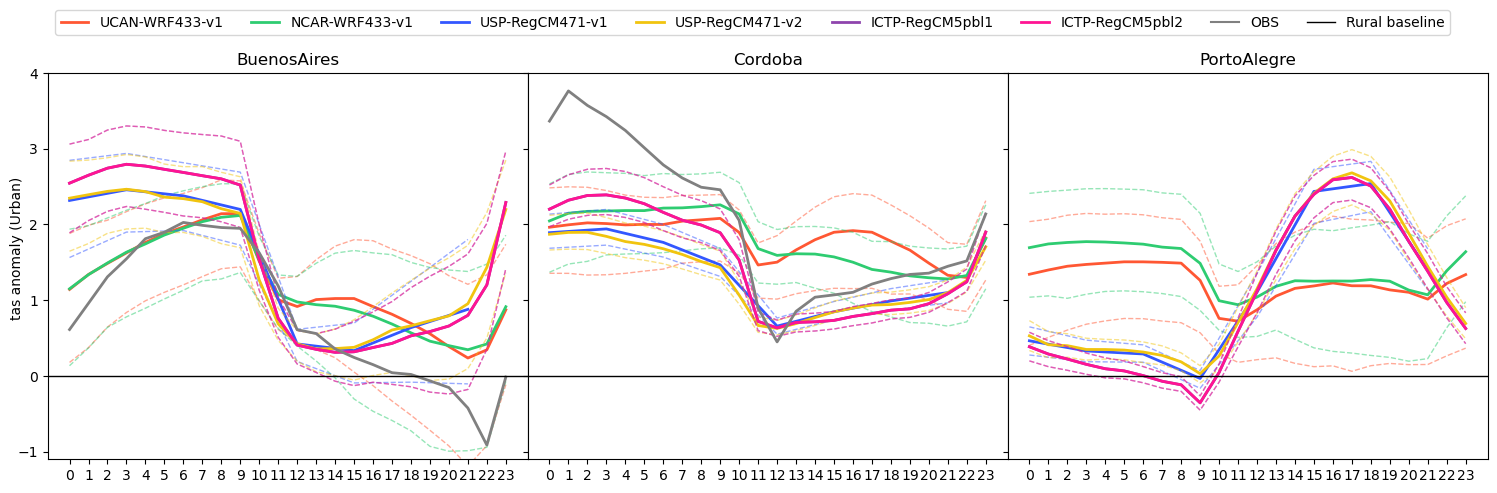

In [180]:
fig = plot_summary_daily_cicle_djf(
    variable='tas',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1','NCAR-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2', 'ICTP-RegCM5pbl1','ICTP-RegCM5pbl2', 'OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=4, vmin=-1.1
)

fig.savefig("results/tas_summary_djf.pdf", format='pdf')


/tmp/ipykernel_28664/235662412.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/hurs_PortoAlegre-CSAM-4i_OBS*_day_cycle_djf-ur.nc


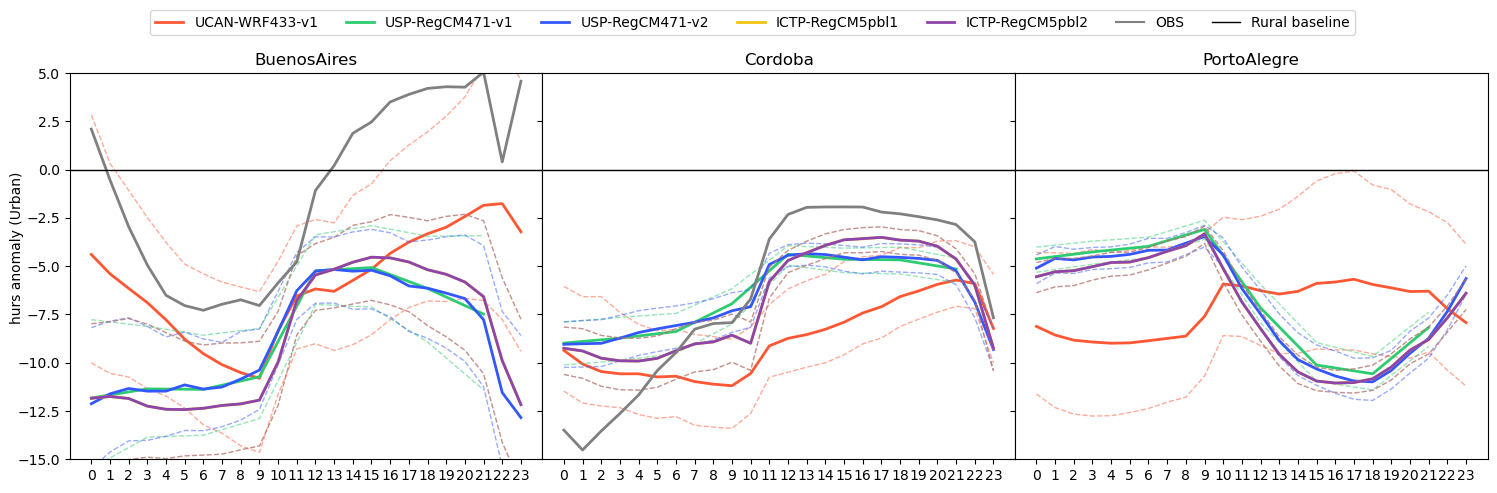

In [177]:
fig = plot_summary_daily_cicle_djf(
    variable='hurs',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1','USP-RegCM471-v1','USP-RegCM471-v2', 'ICTP-RegCM5pbl1','ICTP-RegCM5pbl2','OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=5, vmin=-15
)

fig.savefig("results/hurs_summary_djf.pdf", format='pdf')


/tmp/ipykernel_28664/235662412.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


No files found matching pattern: results/PortoAlegre-CSAM-4i_OBS*/sfcWind_PortoAlegre-CSAM-4i_OBS*_day_cycle_djf-ur.nc


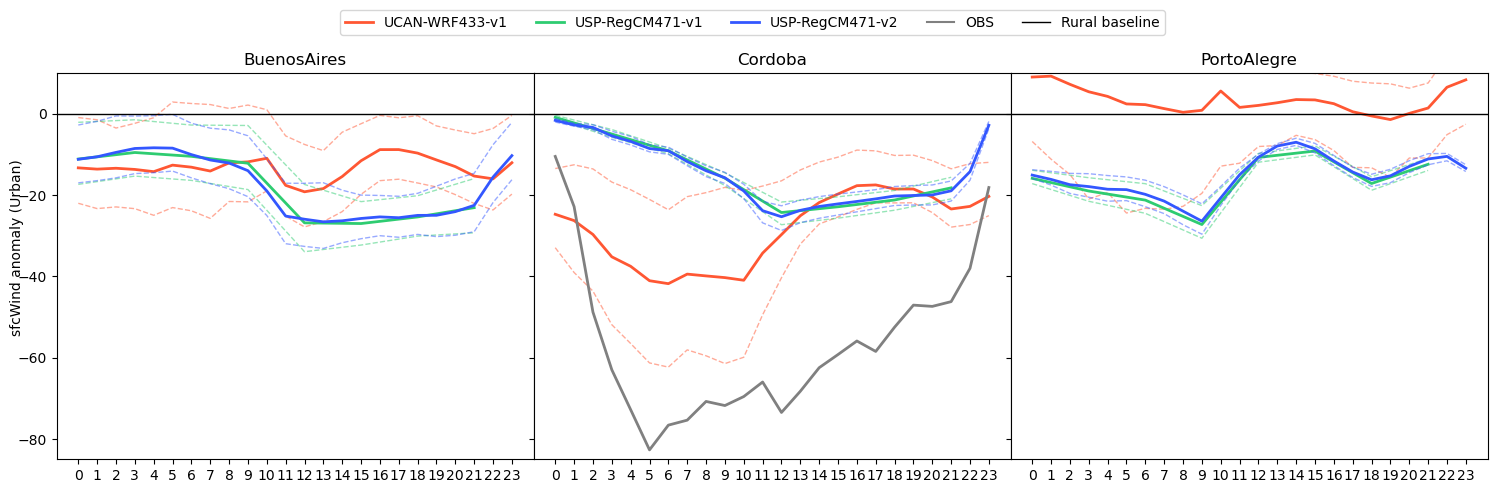

In [178]:
fig = plot_summary_daily_cicle_djf(
    variable='sfcWind',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2', 'OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=10, vmin=-85
)

fig.savefig("results/sfcWind_summary_djf.pdf", format='pdf')


In [167]:
def plot_summary_daily_cicle_heatwaves(variable, base_output_dir, domain, model_list, city_list, scenario='', vmax=3, vmin=-1):
    """
    Plots the urban mean, percentiles (10th and 90th), and the shaded area between them
    for each model and city. Each model is plotted with a different color.

    Additionally, plots a horizontal red line representing the rural baseline (0).

    Parameters:
        variable (str): Name of the variable to analyze.
        base_output_dir (str): Base directory for output files.
        domain (str): Domain identifier.
        model_list (list): List of models to process.
        city_list (list): List of cities to process.
        scenario (str): Scenario identifier, used in file naming.
        vmax (float): Maximum y-axis value.
        vmin (float): Minimum y-axis value.

    Returns:
        matplotlib.figure.Figure: The generated figure.
    """
    colors = plt.cm.get_cmap('tab10', len(model_list)) 

    cmap  = ['#FF5733', '#2ECC71', '#3357FF', '#F1C40F', '#8E44AD', '#FF1493']
    colors = ListedColormap(cmap)

    n_cols = len(city_list)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5), sharey=True)

    if n_cols == 1:
        axes = [axes]

    scenario = 'evaluation'

    # Create a dictionary to track model handles for legend
    model_handles = {}
    rural_line = None  # Store rural line handle

    for i, city in enumerate(city_list):
        ax = axes[i]

        for j, model in enumerate(model_list):
            # Construct the path pattern to the NetCDF files
            output_dir_pattern = f"heatwaves_{city}"
            cachefile_pattern = f"results/{output_dir_pattern}/{variable}_{city}*{model}*_anomaly-ur.nc"
            
            # Use glob to find matching file
            cachefiles = glob.glob(cachefile_pattern)

            if not cachefiles:
                print(f"No files found matching pattern: {cachefile_pattern}")
                continue
            
            for cachefile in cachefiles:
                ds = xr.open_dataset(cachefile)
                if model == 'OBS':
                    line, = ax.plot(
                        ds['hour'], ds['urban_mean'], color='grey', linewidth=2, label=model if i == 0 else ""
                    )
                    print(ds)
                else:
                    # Construct the path pattern to the NetCDF files
                    output_dir_pattern = f"heatwaves_{city}"
                    cachefile_pattern = f"results/{output_dir_pattern}/{variable}_{city}*{model}*_anomaly-ur.nc"
                    
                    # Use glob to find matching files
                    cachefiles = glob.glob(cachefile_pattern)
                    
                    if not cachefiles:
                        print(f"No files found matching pattern: {cachefile_pattern}")
                        continue
                        
                    # Calculate percentiles
                    percentile_10 = ds['urban_anomaly'].quantile(0.1, dim=['lat', 'lon'])
                    percentile_90 = ds['urban_anomaly'].quantile(0.9, dim=['lat', 'lon'])
        
                    # Plot urban mean
                    line, = ax.plot(
                        ds['hour'], ds['urban_mean'], color=colors(j), linewidth=2, label=model if i == 0 else ""
                    )
        
                    # Plot percentiles as thinner and softer lines
                    ax.plot(
                        ds['hour'], percentile_10, '--', color=colors(j), linewidth=1, alpha=0.5
                    )
                    ax.plot(
                        ds['hour'], percentile_90, '--', color=colors(j), linewidth=1, alpha=0.5
                    )
        
                    # Fill the area between the 10th and 90th percentiles
                    ax.fill_between(
                        ds['hour'], percentile_10, percentile_90,
                        color=colors(j), alpha=0
                    )
                    ds.close()
        
                    # Store the handle only once (for the first city)
                    if model not in model_handles:
                        model_handles[model] = line

        # Plot horizontal red line for rural mean = 0
        if rural_line is None:  # Only add to legend once
            rural_line = ax.axhline(0, color='black', linestyle='-', linewidth=1, label='Rural baseline')
        else:
            ax.axhline(0, color='black', linestyle='-', linewidth=1)

        ax.set_title(city)
        #ax.set_xlabel("Month")
        ax.set_xticks(range(0, 24))
        #ax.set_ylabel(f"{variable} anomaly (Urban)")
        ax.set_ylim(vmin, vmax)

    # Proper legend showing one line per model + rural baseline
    obs_line = Line2D([0], [0], color='grey', linestyle='-', label='OBS')
    
    fig.legend(
        handles=list(model_handles.values()) + [obs_line, rural_line],
        labels=list(model_handles.keys()) + ['OBS', 'Rural baseline'],
        loc='upper center',
        ncol=len(model_list) + 2,
        bbox_to_anchor=(0.5, 0.99)
    )
    fig.text(0.005, 0.5, f"{variable} anomaly (Urban)", va='center', rotation='vertical')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, wspace=0)
    plt.show()
    return fig


/tmp/ipykernel_28664/501190793.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_list))


<xarray.Dataset> Size: 288B
Dimensions:     (hour: 24)
Coordinates:
  * hour        (hour) int32 96B 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
Data variables:
    urban_mean  (hour) float64 192B 0.0 0.5 0.9 1.2 0.1 ... 0.3 1.3 1.7 0.7 1.3
<xarray.Dataset> Size: 288B
Dimensions:     (hour: 24)
Coordinates:
  * hour        (hour) int32 96B 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
Data variables:
    urban_mean  (hour) float64 192B 2.6 5.0 4.8 4.4 5.4 ... 3.0 1.8 1.6 1.8 1.6
No files found matching pattern: results/heatwaves_PortoAlegre/tas_PortoAlegre*OBS*_anomaly-ur.nc


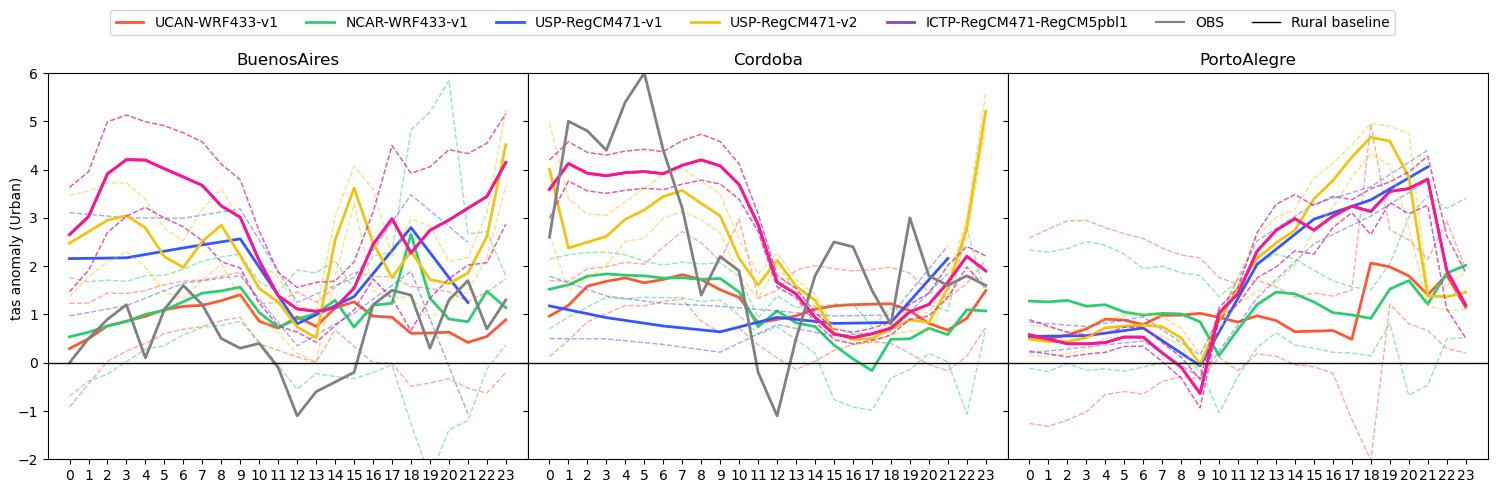

In [179]:
fig = plot_summary_daily_cicle_heatwaves(
    variable='tas',
    base_output_dir=base_output_dir,
    domain='CSAM-4i',
    model_list=['UCAN-WRF433-v1','NCAR-WRF433-v1', 'USP-RegCM471-v1','USP-RegCM471-v2', 'ICTP-RegCM471-RegCM5pbl1','ICTP-RegCM471-RegCM5pbl1', 'OBS'],
    city_list=['BuenosAires','Cordoba','PortoAlegre'], vmax=6, vmin=-2
)

fig.savefig("results/tas_summary_heatwave.pdf", format='pdf')
